# Analysing the top 50 TV shows based on IMDb data

<br>

![HomerURL](https://sprcdn-assets.sprinklr.com/674/8b955864-7307-4d41-8ded-c194170f5305-2729152590.jpg)

<br>



### What is this project about?
Nowadays, there are almost unlimited number of TV shows available across all the platforms. If you have to pick up what's the next show you want to watch, how would you choose? Can you detect what TV shows will potentially dissapoint you before you start watching it?

We will analyse the data to identify similar patterns among them, but also explain their differences. For example, are older shows better than the latest ones? Which TV shows are particularly good during the first seasons but then they become bad and boring? Or is there a clear trend when TV shows start to receive worse ratings?

### What data will we use?
The main goal is to obtain data about the top 50 TV shows based on the IMDb paltform. They are selected based on the number of votes their episodes get over time. Since the dataset is not publicly available, we will have to scrape that data from its website.

### Project structure
0. Import necessary libraries
1. Scrape data
2. Clean data
3. Exploratory data analysis



### 0. Import libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np

# Libraries to scrape the data
from requests import get
from bs4 import BeautifulSoup

# Libraries for visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import date
%matplotlib inline

### 1. Scrape data from IMDb
We will need 3 inputs for our function to scrape our data: the name of the tv show, IMDb id and number of seasons. This may take a while, so run the following block and prepare a cup of coffee... ☕

In [ ]:
# Initializing the shows that the loop will populate
tv_shows_episodes = []

# Create our own dataframe. The specific names, shows' ids and number of seasons
#   are hardcoded in the code
df = pd.DataFrame({'show_name': ['breaking_bad', 'game_of_thrones', 'friends', 'big_bang_theory', 'dexter', 'how_i_met_your_mother', 'the_office', 'stranger_things', 'true_detective', 'black_mirror', 'peaky_blinders', 'vikings', 'better_call_saul', 'rick_and_morty', 'westworld', 'house_md', 'supernatural', 'modern_family', 'suits', 'the_soprano', 'the_simpsons', 'family_guy', 'lucifer', 'american_horror_story', 'money_heist', 'prison_break', 'lost', 'heroes', 'narcos', 'shameless', 'seinfeld', 'ozark', 'greys_anatomy', 'the_blacklist', 'the_crown', 'bones', 'the_good_doctor', 'doctor_who', 'the_walking_dead', 'house_of_cards', 'daredevil', 'arrow', 'mr_robot', 'dark', 'fargo', 'south_park', 'homeland', 'the_wire', 'the_vampire_diaries', 'brooklyn_nine_nine'], 'show_id': ['tt0903747', 'tt0944947', 'tt0108778', 'tt0898266', 'tt0773262', 'tt0460649', 'tt0386676', 'tt4574334', 'tt2356777', 'tt2085059', 'tt2442560', 'tt2306299', 'tt3032476', 'tt2861424', 'tt0475784', 'tt0412142', 'tt0460681', 'tt1442437', 'tt1632701', 'tt0141842', 'tt0096697', 'tt0182576', 'tt4052886', 'tt1844624', 'tt6468322', 'tt0455275', 'tt0411008', 'tt0813715', 'tt2707408', 'tt1586680', 'tt0098904', 'tt5071412', 'tt0413573', 'tt2741602', 'tt4786824', 'tt0460627', 'tt6470478', 'tt0436992', 'tt1520211', 'tt1856010', 'tt3322312', 'tt2193021', 'tt4158110', 'tt5753856', 'tt2802850', 'tt0121955', 'tt1796960', 'tt0306414', 'tt1405406', 'tt2467372'], 'total_seasons': [5, 8, 10, 12, 8, 9, 9, 4, 3, 5, 6, 6, 6, 5, 4, 8, 15, 11, 9, 6, 33, 20, 6, 10, 5, 5, 6, 4, 3, 11, 9, 4, 18, 9, 4, 12, 5, 13, 10, 6, 3, 8, 4, 3, 4, 25, 8, 5, 8, 8]})
df = df.reset_index()

# Loop over our dataframe and scrape
for i in (df.index.to_list()):
    show_name = df[df.index==i].show_name.item()
    show_id = df[df.index==i].show_id.item()
    total_seasons = df[df.index==i].total_seasons.item() + 1

    # For every season in the show range depends on the show
    for sn in range(1,total_seasons):
        
        # Request from the server the content of the web page by using get(), 
        #    and store the server’s response in the variable response
        response = get(f'https://www.imdb.com/title/{show_id}/episodes?season=' + str(sn))

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the episode containers from the season's page
        episode_containers = page_html.find_all('div', class_ = 'info')

        # For each episode in each season
        for episodes in episode_containers:
            
                # Get the info of each episode on the page
                season = sn
                episode_number = episodes.meta['content']
                title = episodes.a['title']
                airdate = episodes.find('div', class_='airdate').text.strip()
                rating = episodes.find('span', class_='ipl-rating-star__rating').text
                total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
                # Compiling the episode info
                episode_data = [show_name, season, episode_number, title, airdate, rating, total_votes]

                # Append the episode info to the complete dataset
                tv_shows_episodes.append(episode_data)

# Define the final dataset only with the columns we need                
scraped_df = pd.DataFrame(tv_shows_episodes, columns = ['show', 'season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes'])

# Let's have a look at the dataset
scraped_df.head()

### * Alternatively you can import the already scraped dataset

In [2]:
# Import
scraped_df = pd.read_csv('top_50_tv_shows_imdb.csv', index_col=[0])

### 2. Clean fields and create additional variables to our dataset

In [4]:
# How does our raw data look like?
scraped_df

,show,season,episode_number,title,airdate,rating,total_votes
0,breaking_bad,1,1,Pilot,20 Jan. 2008,9.0,"(37,076)"
1,breaking_bad,1,2,Cat's in the Bag...,27 Jan. 2008,8.6,"(27,045)"
2,breaking_bad,1,3,...And the Bag's in the River,10 Feb. 2008,8.7,"(26,187)"
3,breaking_bad,1,4,Cancer Man,17 Feb. 2008,8.2,"(25,250)"
4,breaking_bad,1,5,Gray Matter,24 Feb. 2008,8.3,"(24,798)"
...,...,...,...,...,...,...,...
6988,brooklyn_nine_nine,8,6,The Set Up,26 Aug. 2021,6.7,"(2,241)"
6989,brooklyn_nine_nine,8,7,Game of Boyles,2 Sep. 2021,7.9,"(1,970)"
6990,brooklyn_nine_nine,8,8,Renewal,2 Sep. 2021,8.0,"(1,839)"
6991,brooklyn_nine_nine,8,9,The Last Day Pt 1,16 Sep. 2021,9.2,"(3,034)"


In [5]:
# Clean total_votes columns
scraped_df['total_votes'] = scraped_df['total_votes'].apply(str).str.replace(r'[()]',"").str.replace(',', '').astype(int)

# Substract year from airdate column per each episode
scraped_df['year'] = pd.to_datetime(scraped_df.airdate.str[-4:]).dt.year

# Create a new column with the first episode's year on air for each tv show
first_year_temp = scraped_df.groupby(['show'])['year'].min().reset_index()
first_year_temp.columns = ['show', 'first_year']
scraped_df = scraped_df.merge(first_year_temp, on='show', how='left')

# Create a new column with the last episode's year on air for each tv show
last_year_temp = scraped_df.groupby(['show'])['year'].max().reset_index()
last_year_temp.columns = ['show', 'last_year']
scraped_df = scraped_df.merge(last_year_temp, on='show', how='left')

# Calculate how many years each TV show was on air
scraped_df['years_on_air'] = scraped_df['last_year'] - scraped_df['first_year']

# Create median rating for each season per show
scraped_df['season_median'] = scraped_df.groupby(['show', 'season'])['rating'].transform('median')

# Calculate the difference between the episode's rating agains its season's median rating
scraped_df['perc_diff_episode_season_median'] = (scraped_df['rating']-scraped_df['season_median'])/scraped_df['season_median']

# How does or final data look like?
scraped_df

/var/folders/jd/y_sz0qz51s93351r8rcl4ty40000gn/T/ipykernel_2494/3861450912.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  scraped_df['total_votes'] = scraped_df['total_votes'].apply(str).str.replace(r'[()]',"").str.replace(',', '').astype(int)


,show,season,episode_number,title,airdate,rating,total_votes,year,first_year,last_year,years_on_air,season_median,perc_diff_episode_season_median
0,breaking_bad,1,1,Pilot,20 Jan. 2008,9.0,37076,2008,2008,2013,5,8.70,0.034483
1,breaking_bad,1,2,Cat's in the Bag...,27 Jan. 2008,8.6,27045,2008,2008,2013,5,8.70,-0.011494
2,breaking_bad,1,3,...And the Bag's in the River,10 Feb. 2008,8.7,26187,2008,2008,2013,5,8.70,0.000000
3,breaking_bad,1,4,Cancer Man,17 Feb. 2008,8.2,25250,2008,2008,2013,5,8.70,-0.057471
4,breaking_bad,1,5,Gray Matter,24 Feb. 2008,8.3,24798,2008,2008,2013,5,8.70,-0.045977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,brooklyn_nine_nine,8,6,The Set Up,26 Aug. 2021,6.7,2241,2021,2013,2021,8,7.75,-0.135484
6989,brooklyn_nine_nine,8,7,Game of Boyles,2 Sep. 2021,7.9,1970,2021,2013,2021,8,7.75,0.019355
6990,brooklyn_nine_nine,8,8,Renewal,2 Sep. 2021,8.0,1839,2021,2013,2021,8,7.75,0.032258
6991,brooklyn_nine_nine,8,9,The Last Day Pt 1,16 Sep. 2021,9.2,3034,2021,2013,2021,8,7.75,0.187097


### 3. Exploratory data analysis

### General overview

In [6]:
print("Summary and some curiosities")
print("=====================================================================================================")
print("- We are analysing the top", scraped_df.show.nunique(), "TV shows")
print("- We are analysing", scraped_df.total_votes.sum(), "votes")
print("- Most TV shows broadcast", scraped_df.groupby(['show'])['season'].nunique().median(), "seasons (median)")
print("- Most TV shows broadcast", scraped_df.groupby(['show', 'season'])['episode_number'].count().median(), "episodes per season (median)")
print("- However those shows that were on air for the first time before 2015")
print("    broadcast more episodes per season (", scraped_df[scraped_df['first_year']<2015].groupby(['show', 'season'])['episode_number'].count().median(), "), than those after 2015 (", scraped_df[scraped_df['first_year']>=2015].groupby(['show', 'season'])['episode_number'].count().median(), "episodes)")
print("- Among the top 50 TV shows, the oldest one is", scraped_df[scraped_df['year']==scraped_df.year.min()].show.unique(), ", which was first broadcasted in", scraped_df.year.min())
print("- The most recent year on air among the top TV shows is", scraped_df.year.max()) 

Summary and some curiosities
- We are analysing the top 50 TV shows
- We are analysing 32211768 votes
- Most TV shows broadcast 7.0 seasons (median)
- Most TV shows broadcast 16.0 episodes per season (median)
- However those shows that were on air for the first time before 2015
    broadcast more episodes per season ( 20.0 ), than those after 2015 ( 10.0 episodes)
- Among the top 50 TV shows, the oldest one is ['the_simpsons' 'seinfeld'] , which was first broadcasted in 1989
- The most recent year on air among the top TV shows is 2022


### How many episodes should we expect per show?

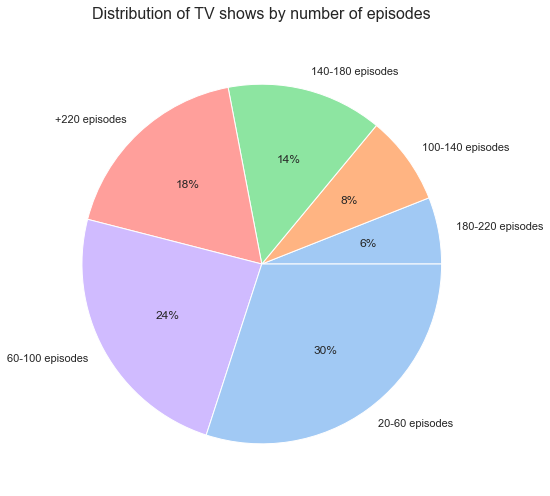

It is very likely that you will watch a tv show with less than 100 episodes


In [7]:
# Specific dataframe, so we can handle our data easier
episodes_show_df = scraped_df.groupby(['show'])['episode_number'].count().sort_values().reset_index()

# Function to classify our shows based on their number of episodes
def episodes_group(group):
    '''Classify TV shows based on their number of episodes'''
    if (group > 20) and (group <= 60):
        return '20-60 episodes'
    elif (group > 60) and (group <= 100):
        return '60-100 episodes'
    elif (group > 100) and (group <= 140):
        return '100-140 episodes'
    elif (group > 140) and (group <= 180):
        return '140-180 episodes'
    elif (group > 180) and (group <= 220):
        return'180-220 episodes'
    elif (group > 220):
        return'+220 episodes'

# Apply function to our dataframe    
episodes_show_df['episodes_group'] = episodes_show_df['episode_number'].apply(episodes_group)

# Define data and labels for our pie chart
data = episodes_show_df.groupby(['episodes_group'])['show'].nunique().sort_values().reset_index()['show']
labels = episodes_show_df.groupby(['episodes_group'])['show'].nunique().sort_values().reset_index()['episodes_group']

# Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Seaborn figure size to use
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

# Add title
plt.title("Distribution of TV shows by number of episodes", pad=20, size=16)

plt.show()

print("It is very likely that you will watch a tv show with less than 100 episodes")

### How long are shows on air?

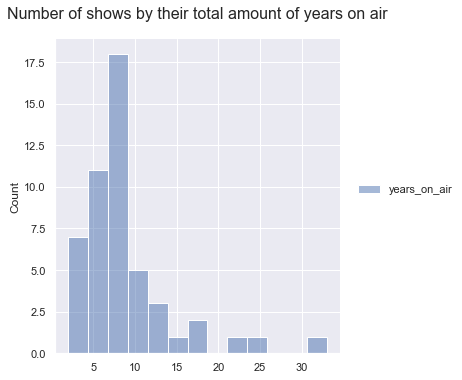

On average, the most popular TV shows are on air for 9.0 years


In [8]:
# Create distribution chart
sns.displot(scraped_df.groupby(['show'])['years_on_air'].first().sort_values().reset_index())

# Add title
plt.title("Number of shows by their total amount of years on air", pad=20, size=16)
plt.show()

print("On average, the most popular TV shows are on air for", round(scraped_df.groupby(['show'])['years_on_air'].first().mean(),1), "years")


### Can we observe any trends in ratings over time?

In [9]:
# Seaborn and other libraries don't deal as well with datetime axes as you might like them to
#  We will convert airdate column to ordinal date, and then we will replace it with the actual dates

scraped_df['date_ordinal'] = pd.to_datetime(scraped_df['airdate']).apply(lambda airdate: airdate.toordinal())

# Create dataframe for the specific tv show
df_trendline_plot_temp = scraped_df[['show', 'airdate', 'date_ordinal', 'rating']]

# Create our custom function to avoid repeating code
def create_trendline_plot(show):
    df_trendline_plot = df_trendline_plot_temp[df_trendline_plot_temp['show']==show]

    date = df_trendline_plot.airdate.tolist()
    value = df_trendline_plot.rating.tolist()
    df = pd.DataFrame({
        'date': pd.to_datetime(date),   # pandas dates
        'airdate': dates.datestr2num(date), # maptlotlib dates
        'rating': value
    })

    @plt.FuncFormatter
    def fake_dates(x, pos):
        """ Custom formater to turn floats into e.g., 2016-05-08"""
        return dates.num2date(x).strftime('%Y-%m-%d')

    fig, ax = plt.subplots()    

    # here's the magic:
    ax.xaxis.set_major_formatter(fake_dates)

    # legible labels
    ax.tick_params(labelrotation=45)
    
    return sns.regplot('airdate', 'rating', data=df, ax=ax, fit_reg=True, line_kws={'color': 'orange'})

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Money Heist ratings over time')

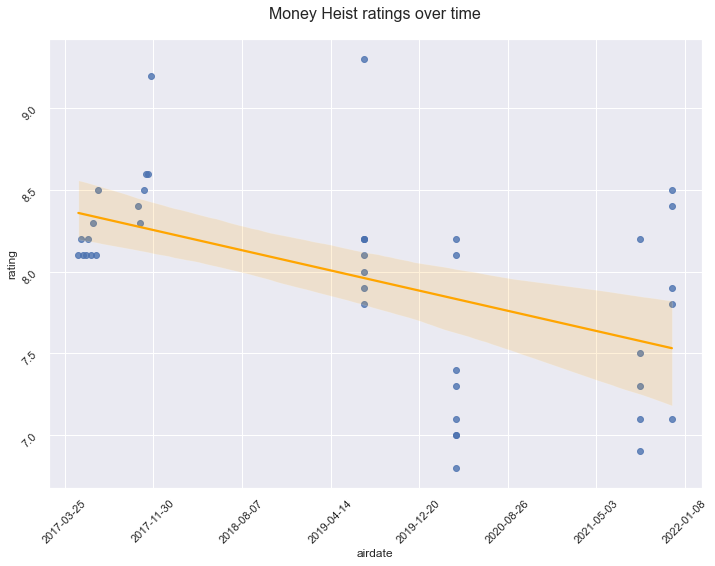

In [10]:
# Plot chart
create_trendline_plot('money_heist')

# Add title
plt.title("Money Heist ratings over time", pad=20, size=16)

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Game of Thrones ratings over time')

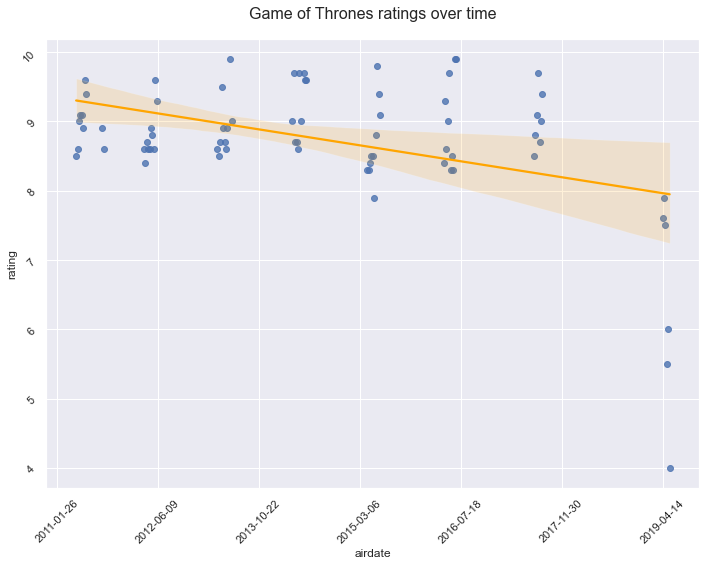

In [11]:
# Plot chart
create_trendline_plot('game_of_thrones')

# Add title
plt.title("Game of Thrones ratings over time", pad=20, size=16)

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Simpsons ratings over time')

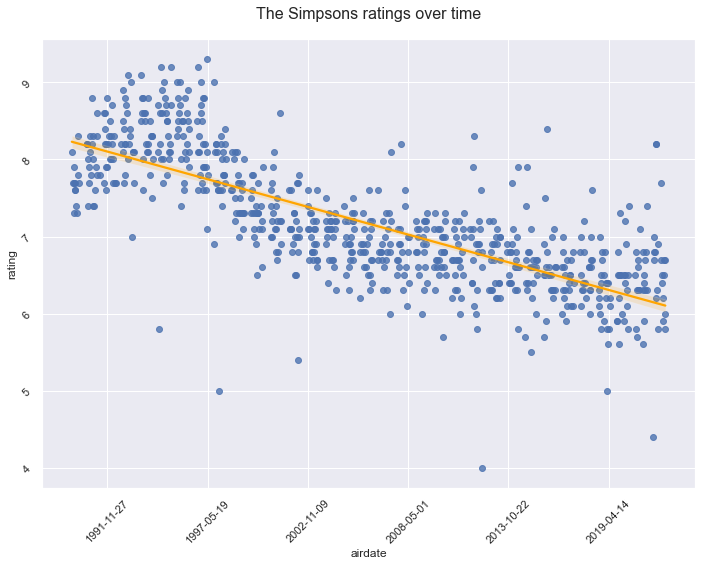

In [12]:
# Plot chart
create_trendline_plot('the_simpsons')

# Add title
plt.title("The Simpsons ratings over time", pad=20, size=16)

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Breaking Bad ratings over time')

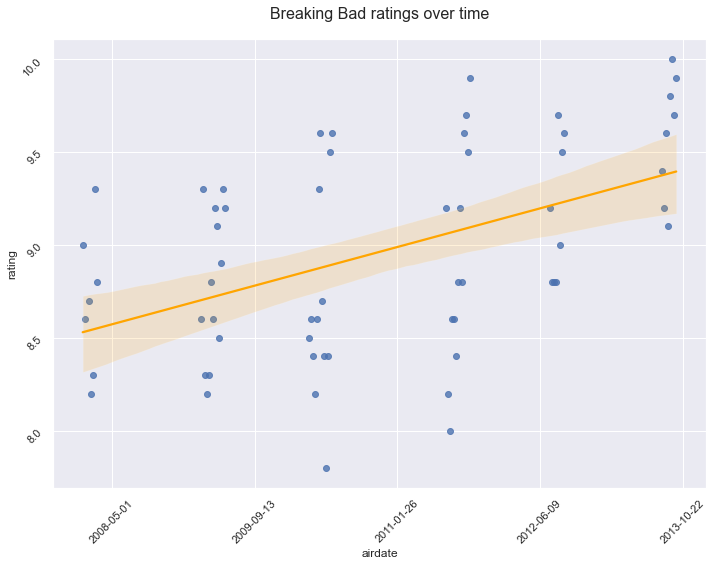

In [13]:
# Plot chart
create_trendline_plot('breaking_bad')

# Add title
plt.title("Breaking Bad ratings over time", pad=20, size=16)

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Friends ratings over time')

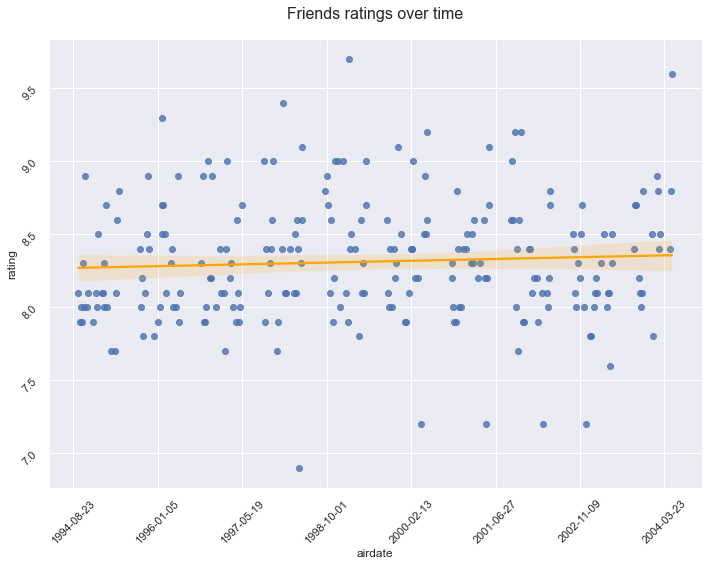

In [14]:
# Plot chart
create_trendline_plot('friends')

# Add title
plt.title("Friends ratings over time", pad=20, size=16)

/Users/nordigen-data/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Preaky Blinders ratings over time')

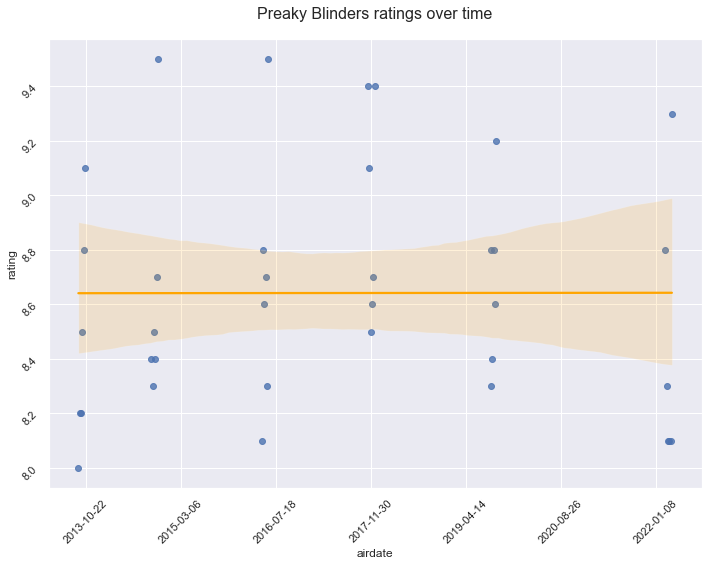

In [15]:
# Plot chart
create_trendline_plot('peaky_blinders')

# Add title
plt.title("Preaky Blinders ratings over time", pad=20, size=16)

### Spotting different trends using heatmaps
This kind of chart allows us to visualise all TV show's episodes at once based on their ratings. From it, we can answer questions like: are all episodes equally rated? When a tv show tends to become worse rated over time? Are some TV shows designed to surprise you at the end of each season and keep you engaged until the release of a new season?

#### There are some TV shows whose final seasons were a bit disappointing compared to their first seasons...

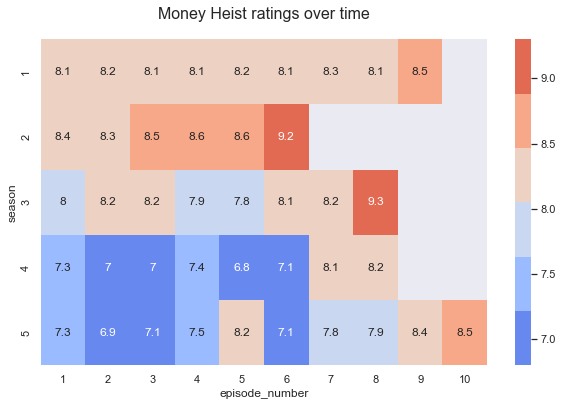

In [16]:
# Create dataframe with Money Heist data only
money_heist_df = scraped_df[scraped_df['show']=='money_heist']
df = money_heist_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(10, 6))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Money Heist ratings over time", pad=20, size=16)
plt.show()

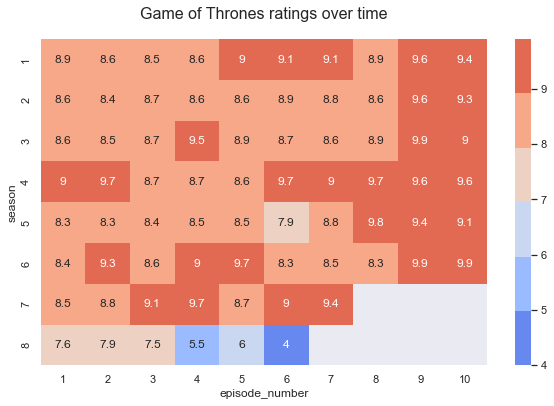

In [17]:
# Create dataframe with Game of Thrones data only
got_df = scraped_df[scraped_df['show']=='game_of_thrones']
df = got_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(10, 6))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Game of Thrones ratings over time", pad=20, size=16)
plt.show()

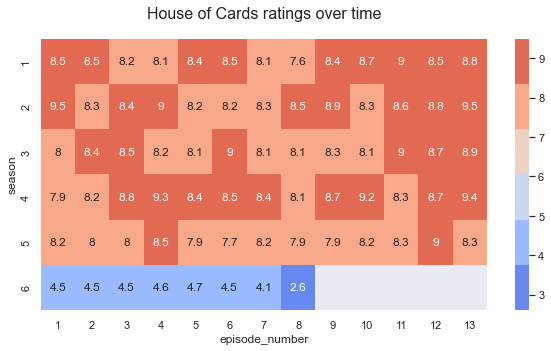

In [18]:
# Create dataframe with House of Cards data only
house_of_cards_df = scraped_df[scraped_df['show']=='house_of_cards']
df = house_of_cards_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(10, 5))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("House of Cards ratings over time", pad=20, size=16)
plt.show()

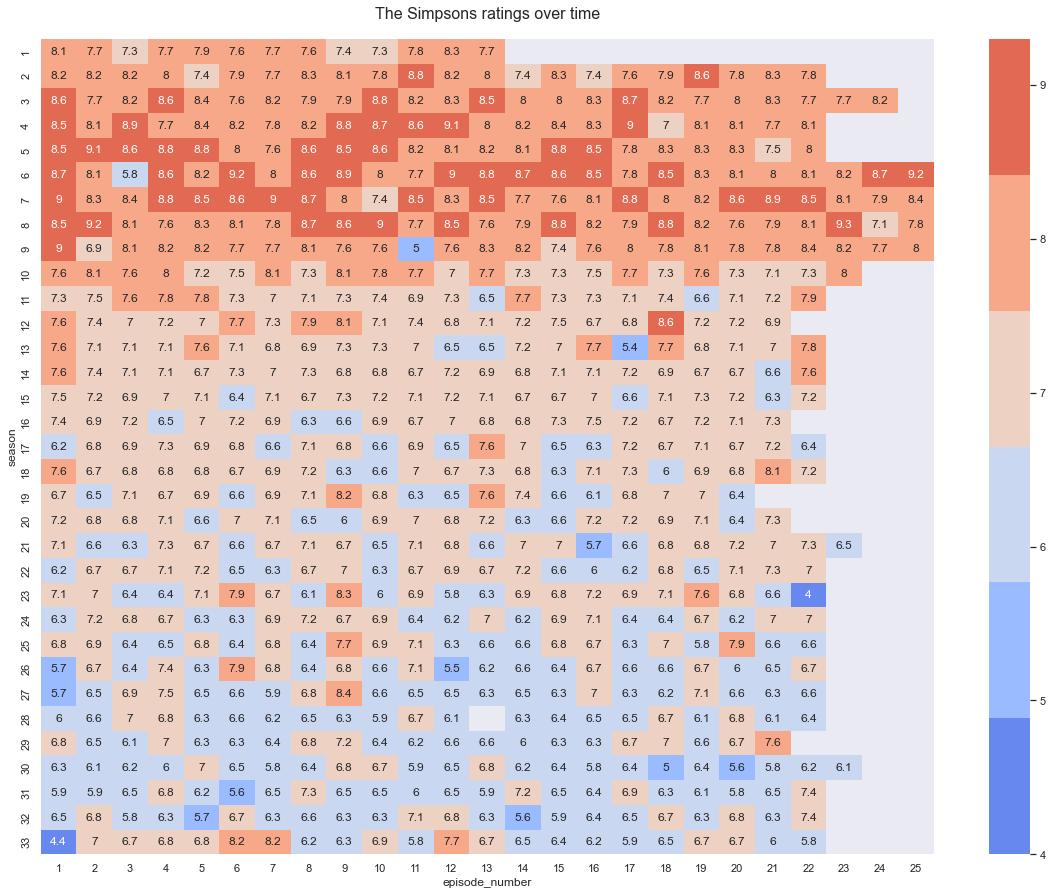

In [19]:
# Create dataframe with The Simpsons data only
simpsons_df = scraped_df[scraped_df['show']=='the_simpsons']
df = simpsons_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    
    
# Plotting ratings
plt.figure(figsize=(20, 15))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("The Simpsons ratings over time", pad=20, size=16)
plt.show()

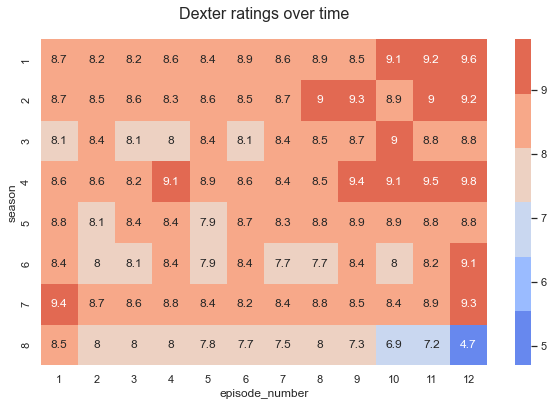

In [20]:
# Create dataframe with Dexter data only
dexter_df = scraped_df[scraped_df['show']=='dexter']
df = dexter_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(10, 6))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Dexter ratings over time", pad=20, size=16)
plt.show()

#### However there are other TV shows whose final season was very well rated!

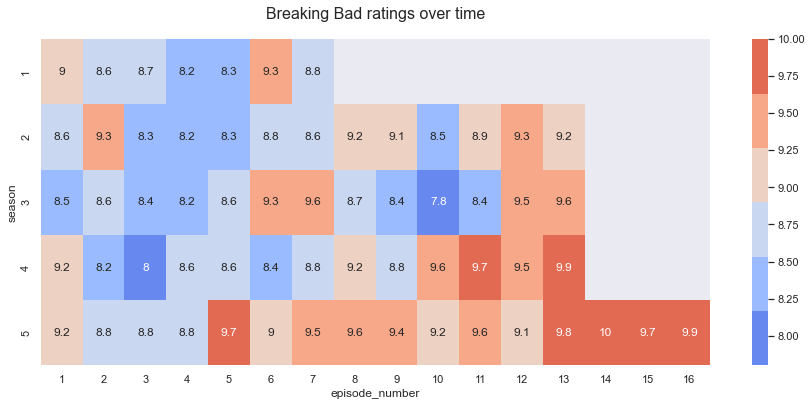

In [21]:
# Create dataframe with Breaking Bad data only
breaking_bad_df = scraped_df[scraped_df['show']=='breaking_bad']
df = breaking_bad_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    
 
# Plotting ratings
plt.figure(figsize=(15, 6))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Breaking Bad ratings over time", pad=20, size=16)
plt.show()

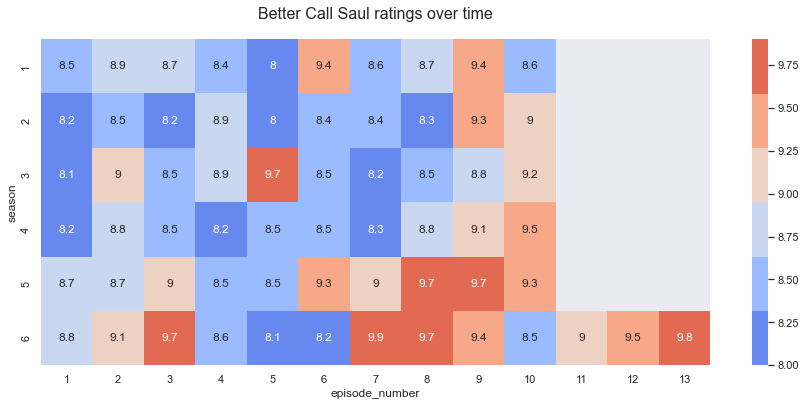

In [22]:
# Create dataframe with Better Call Saul data only
better_call_saul_df = scraped_df[scraped_df['show']=='better_call_saul']
df = better_call_saul_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(15, 6))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Better Call Saul ratings over time", pad=20, size=16)
plt.show()

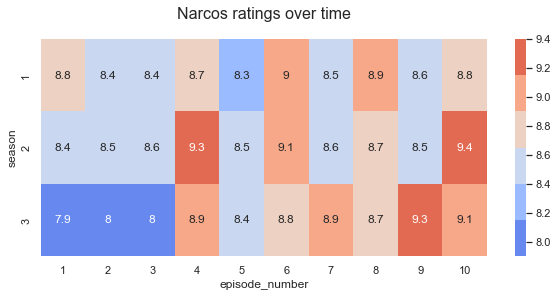

In [23]:
# Create dataframe with Narcos data only
narcos_df = scraped_df[scraped_df['show']=='narcos']
df = narcos_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(10, 4))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Narcos ratings over time", pad=20, size=16)
plt.show()

#### But there are other shows that don't follow a clear general trend - yet there are some insights that can be perceived at certain moments of the seasons

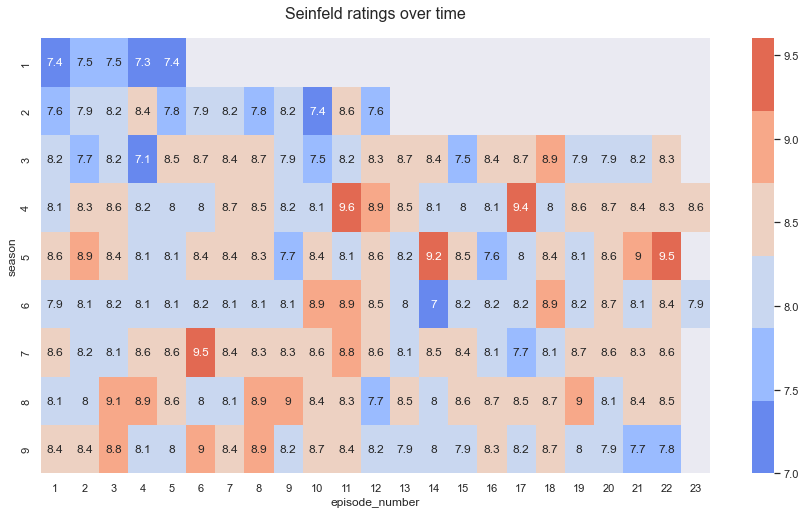

In [24]:
# Create dataframe with Seinfeld data only
seinfeld_df = scraped_df[scraped_df['show']=='seinfeld']
df = seinfeld_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    

# Plotting ratings
plt.figure(figsize=(15, 8))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Seinfeld ratings over time", pad=20, size=16)
plt.show()

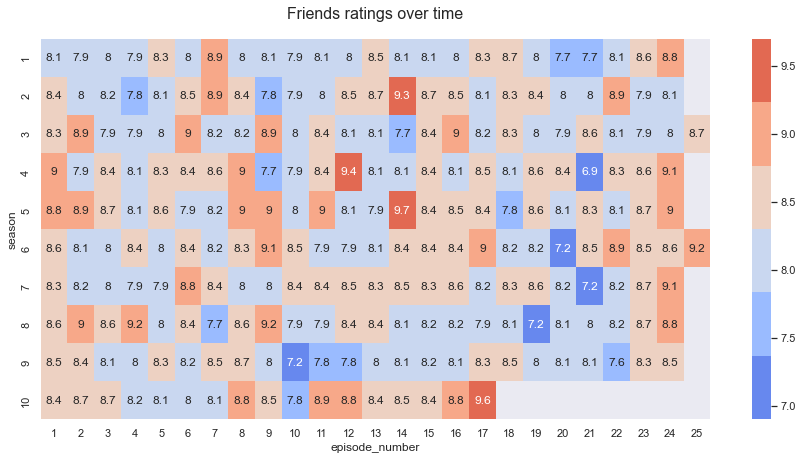

In [25]:
# Create dataframe with Friends data only
friends_df = scraped_df[scraped_df['show']=='friends']
df = friends_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    
    
# Plotting ratings
plt.figure(figsize=(15, 7))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Friends ratings over time", pad=20, size=16)
plt.show()

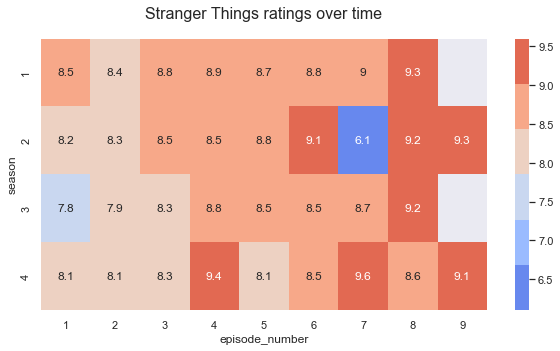

In [26]:
# Create dataframe with Stranger Things data only
stranger_things_df = scraped_df[scraped_df['show']=='stranger_things']
df = stranger_things_df[['season', 'episode_number','rating']].pivot('season', 'episode_number','rating')    
    
# Plotting ratings
plt.figure(figsize=(10, 5))
colormap = sns.color_palette("coolwarm")
sns.heatmap(df, annot=True, annot_kws={"size": 12}, cmap = colormap)
plt.title("Stranger Things ratings over time", pad=20, size=16)
plt.show()

### Are last seasons generally worse rated than first seasons?

In [27]:
# Specific dataframe, so we can handle our data easier
seasons_show_filter_df = scraped_df.groupby(['show'])['season'].max().sort_values().reset_index()

# Function to classify our shows based on their number of seasons
def seasons_group(season):
    '''Classify TV shows based on their number of seasons'''
    if (season < 4):
        return 'less_4_seasons'
    elif (season >= 4):
        return '4_seasons_or_more'

# Apply function to our dataframe    
seasons_show_filter_df['seasons_group'] = seasons_show_filter_df['season'].apply(seasons_group)

# Array to filter the dataframe
seasons_show_filter_array = seasons_show_filter_df[seasons_show_filter_df['seasons_group']=='less_4_seasons'].show.unique()

# Filter dataframe with shows with more than 4 seasons
filtered_4seasons_shows_df_temp = scraped_df[~scraped_df.show.isin(seasons_show_filter_array)]

# Get the average rating per season per show
filtered_4seasons_shows_df = filtered_4seasons_shows_df_temp.groupby(['show', 'season'])['rating'].mean().reset_index()

# Get the dataframe with the 2 first and last seasons
filt_temp_df = filtered_4seasons_shows_df.groupby('show').apply(lambda x: x.iloc[[0,1, -2,-1]]).reset_index(drop=True)

# Get the dataframe with the average rating for the first 2 seasons per show
head_df_temp = filt_temp_df.groupby('show').head(2)
head_df = head_df_temp.groupby(['show'])['rating'].mean().reset_index()
head_df.columns = ['show', 'first_2_seasons']

# Get the dataframe with the average rating for the last 2 seasons per show
tail_df_temp = filt_temp_df.groupby('show').tail(2)
tail_df = tail_df_temp.groupby(['show'])['rating'].mean().reset_index()
tail_df.columns = ['show', 'last_2_seasons']

# Create dataframe with the tv show and their average rating for the first and last 2 seasons
df_beginning_end_comparison = head_df.merge(tail_df, on='show', how='left')
df_beginning_end_comparison['diff_beg_end_rating'] = round((df_beginning_end_comparison['last_2_seasons'] - df_beginning_end_comparison['first_2_seasons']) / df_beginning_end_comparison['first_2_seasons'], 2)

In [28]:
print("Only", round(df_beginning_end_comparison[df_beginning_end_comparison.diff_beg_end_rating > 0].show.nunique() / df_beginning_end_comparison.show.nunique(), 2)*100, "% of the shows have better rating on their last 2 seasons compared to their first 2 seasons")

# Show table with differences in ratings
df_beginning_end_comparison.sort_values(by=['diff_beg_end_rating'], ascending = False)


Only 17.0 % of the shows have better rating on their last 2 seasons compared to their first 2 seasons


,show,first_2_seasons,last_2_seasons,diff_beg_end_rating
29,seinfeld,7.693333,8.363636,0.09
2,better_call_saul,8.620000,9.070000,0.05
6,breaking_bad,8.746154,9.171394,0.05
24,mr_robot,8.649167,9.122692,0.05
25,ozark,8.230000,8.383571,0.02
43,the_wire,8.505769,8.680769,0.02
40,the_soprano,8.607692,8.686630,0.01
12,friends,8.233333,8.324632,0.01
26,peaky_blinders,8.550000,8.566667,0.00
32,stranger_things,8.622222,8.553472,-0.01
